# Tutorial: Probabilistic PCA



In this tutorial, we will focus on some derivations 
that are important to understand better the link between PPCA and PCA. 
The introduced techniques are frequently applied in various Gaussian 
models and dimension-reduction techniques.

We conclude with an explicit example.

## Recall: Deterministic PCA
In PCA we have $n$ inputs $(x^{(i)})_{1\leq i \leq N}$, where each input is a $D$-dimensional vector, i.e. $x^{(i)} \in \mathbb{R}^D$, and our goal is to find a good $K$-dimensional representation for data, preferably with $K \ll D$. In other words, we want to find a matrix $U \in \mathbb{R}^{D \times K}$ with orthonormal columns (i.e. $U^TU = I_K$), such that $x^{(i)} \approx \hat{\mu} + Uz^{(i)}$, where $\hat{\mu} = \frac{1}{n}\sum_{i=1}^nx^{(i)}$. This gives us a way to project $x$ onto a low-dimensional subspace, namely $z^{(i)} = U^T(x^{(i)}-\hat{\mu})$, and the reconstructed $x$ would be $\hat{x}^{(i)} = \hat{\mu} + UU^T(x^{(i)}-\hat{\mu})$. A natural goal is to ask for a small sum of squared reconstruction errors:
$$U^* = \operatorname{argmin}_U \sum_{i=1}^N\lVert x^{(i)} - \hat{\mu} - UU^T(x^{(i)} - \hat{\mu})\rVert^2.$$
Notice how this task for $K=D$ is trivial, as we can choose $U = I_D$.

## From deterministic to probabilistic PCA
One way to think about dimension reduction is that there is some latent (hidden) variable $z$ that is low-dimensional, but instead of observing it directly, we only get to observe it after it is linearly transformed into a high-dimensional space, and some small (isotropic) noise is added. We call this observation $x$. In contrast to Gaussian Mixture Models were assume $z$ can only take a finite number of states, in PPCA we assume that $z$ has a Gaussian prior:
$$z \sim \mathcal{N}(0,I_K),$$
$$x|z \sim \mathcal{N}(Wz + \mu, \sigma^2 I_D).$$
In other words, we have $x = Wz + \mu + \epsilon$, where $\epsilon$ is an istotropic Gaussian noise, i.e. $\epsilon \sim \mathcal{N}(0,\sigma^2 I_D)$. Thus, our problem is reduced to estimating $W$ and $\mu$ through our observations $(x^{(i)})_{1\leq i\leq N}$.

## MLE of $W, \mu, \sigma$
We can simply observe the posterior distribution of $x$, $p(x|W,\mu,\sigma^2) = \int_z p(x|z,W,\mu,\sigma^2)p(z)dz$, is Gaussian, since the Gaussian distribution is a conjugate prior to itself. Therefore, it suffices to compute $E[x]$ and $Cov[x]$, and simple calculation shows
$$E[x] = \mu,$$
$$Cov[x] = WW^T + \sigma^2 I_D.$$
Thus we have $x|W,\mu,\sigma \sim \mathcal{N}(\mu, WW^T + \sigma^2 I_D)$. From this, we can obtain the MLE for $W$ and $\mu$:
$$\hat{\mu} = \frac{1}{N}\sum_{i=1}^Nx^{(i)},$$
$$\hat{W} = \hat{U}(\hat{L} - \hat{\sigma}^2 I_K)^\frac{1}{2}R^T,$$
where $\hat{U} \in \mathbb{R}^{D \times K}$ and the columns of $\hat{U}$ correspond to the top $K$ eigenvectors of the sampel covariance matrix, $\hat{L} \in \mathbb{R}^{K \times K}$ is a diagonal matrix whose elements are the corresponding top eigenvalues, and 
$$\hat{\sigma}^2 = \frac{1}{D-K}\sum_{i=K+1}^D\lambda_i$$
is the average of the next $D-K$ eigenvalues.


## Matrix inversion and PPCA

Recall that in probabilistic PCA, $x\in \mathbb R^D$, $z\in \mathbb R^K$ and the covariance matrix of $x$ was  $C=\sigma^2 I_D + W W^\top$, where $W\in \mathbb R^{D\times K}$ was such that $x=Wz+\epsilon$. In many applications $D$ can be very large (e.g. color images) and $K$ relatively small.

One of the computational burdens can be inverting $C$. Inverting a $D\times D$ matrix has computational complexity of $O(D^3)$. For example, if $D=10^4$ then inverting $C$ may require $O(10^{12})$ operations. In situations where $C$ has some special structure this inversion can be done more efficiently. In our case $C$ is a sum of a scalar matrix and a low-rank matrix $WW^\top$.

We will make use of the Woodbury identity, which has many applications in computational statistics. The Woodbury identity states that for a matrix $(A+UBV)$ with $A,B$ invertible, we get
$$
(A+UBV)^{-1}\;=\;A^{-1}-A^{-1}U(B^{-1}+VA^{-1}U)^{-1}VA^{-1}
$$
If $A$ and $B$ are easy to invert, e.g. when they are diagonal, this may give a more efficient formula.

We can prove this formula directly by checking that the righ-hand side really gives the inverse of $A+UBV$. Indeed, denoting $M=(B^{-1}+VA^{-1}U)$, we get
$$
\require{color}
\begin{align*}
I&\;\overset{?}{=}\;(A+UBV)(A^{-1}-A^{-1}UM^{-1}VA^{-1})\\
&\;=\;I-\textcolor{blue}{UM^{-1}VA^{-1}}+UBVA^{-1}-UBVA^{-1}UM^{-1}VA^{-1}\\
&\;=\;I-\textcolor{blue}{UB{(B^{-1}+VA^{-1}U)}M^{-1}VA^{-1}+UBVA^{-1}UM^{-1}VA^{-1}}+UBVA^{-1}-UBVA^{-1}UM^{-1}VA^{-1}\\
&\;=\; I-UBVA^{-1}+UBVA^{-1}\;=\;I \qquad(\mbox{indeed})
\end{align*}
$$

In our case $A=\sigma^2I_D$ and so $A^{-1}=\sigma^{-2}I_D$. Moreover,  $U=V^\top =W$ and $B=I_K$. We get
$$
\begin{align*}
C^{-1}&\;=\;(\sigma^2I_D+WW^\top)^{-1}\;=\;\sigma^{-2}I_D-\sigma^{-4}W(I_K+\sigma^{-2}W^\top W)^{-1}W^\top \\
&\;=\;\sigma^{-2}I_D-\sigma^{-2}W(\sigma^2I_K+W^\top W)^{-1}W^\top\\
&\;=\;\sigma^{-2}(I_D-W(\sigma^2I_K+W^\top W)^{-1}W^\top).
\end{align*}
$$
Note that to compute the inverse of $C$ we then need to first invert a $K\times K$ matrix $\sigma^2I_K+W^\top W$ with computational cost $O(K^3)$.

## PCA as the limit of PPCA

PCA is generally formulated as a projection of points from the $D$-dimensional space onto an $K$-diemnsional linear subspace. PPCA is understood as a mapping from the $K$-dimensional latent space to the data space. To get the reverse direction analysis in PPCA we consider the conditional distribution of z given x, which is also Gaussian. 

Recall the setup
$$
z\sim N_K(0,I_K),\quad x=Wz+\mu+\epsilon, \quad \epsilon\sim N(0,\sigma^2 I_D),\quad \epsilon\perp z.
$$
The covariance of $x$ and $z$ satisfies 
$$\Sigma_{zx}=\mathbb E (z(x-\mu)^\top)=\mathbb E(zz^\top)W^\top=W^\top.$$
Thus, using the standard formula for the conditional Gaussian distribution,
$$
\mathbb E[z|x]=\Sigma_{zx}\Sigma_{xx}^{-1}(x-\mu)=W^\top (\sigma^2 I_D+WW^\top)^{-1}(x-\mu)=W^\top C^{-1}(x-\mu)
$$
and $${\rm var}(z|x)=\Sigma_{zz}-\Sigma_{zx}\Sigma_{xx}^{-1}\Sigma_{xz}=I_K-W^\top C^{-1}W.$$
We will now show how these formulas simplify using the formula proved above:
$$
C^{-1}=\sigma^{-2}(I_D-WM^{-1}W^\top),\qquad M=\sigma^2I_K+W^\top W.
$$
For the conditional mean, we have
$$
\begin{align*}
W^\top C^{-1}&= \sigma^{-2}(W^\top -W^\top WM^{-1}W^\top )= \sigma^{-2}(MM^{-1}W^\top -W^\top WM^{-1}W^\top)\\
&= \sigma^{-2}(M-W^\top W)M^{-1}W^\top=M^{-1}W^\top
\end{align*}
$$
and so 
$$
\mathbb E[z|x]\;=\;M^{-1}W^\top (x-\mu).
$$
Similarly,
$$
I_K-W^\top C^{-1}W=I_K-M^{-1}W^\top W=M^{-1}(M-W^\top W)=\sigma^2M^{-1}
$$
and so
$$
{\rm var}(z|x)\;=\;\sigma^2M^{-1}.
$$
Note that as $\sigma\to 0$ then $M\to W^\top W$, which is an invertible matrix (under minor conditions). In particular, the conditional mean converges to $(W^\top W)^{-1}W^\top (x-\mu)$. If we plug-in the MLEs, we get
$$
(\widehat W^{\top} \widehat W)^{-1}\widehat W^\top (x-\overline x)
$$
This represents the orthogonal projection of $x-\overline x$ onto the column-space of $\widehat W$. Recall that 
$$
\widehat W\;=\;\widehat U(\widehat L-\widehat\sigma^2 I)^{1/2}Q,
$$
where $\widehat U$ is the matrix whose columns are the first $K$ eigenvectors of teh emprirical covariance matrix, $\widehat L$ is a diagonal matrix with the corresponding eigenvalues as diagonal entries, and $Q$ is an orthogonal matrix. This shows that the column-space of $\widehat W$ is the same as the column-space of $\widehat U$, which is the same as the principal subspace in PCA. 

## An example

Here we will play around with an example of probabilistic PCA.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy import stats
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

The code below defines basic plotting procedures. In particular, the plot_principle_axes function takes in a covariance matrix Cov, a mean vector mu, an Axes3D instance ax, and a color string color. It calculates the principal axes of the covariance matrix Cov and plots them on the 3D plot using the ax.plot method. The principal axes are plotted as lines originating from the mean vector mu and extending in the direction of the principal axes. The color of the lines is specified by the color argument.

In [7]:
class Arrow3D(FancyArrowPatch):

	def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
		super().__init__((0, 0), (0, 0), *args, **kwargs)
		self._xyz = (x, y, z)
		self._dxdydz = (dx, dy, dz)

	def draw(self, renderer):
		x1, y1, z1 = self._xyz
		dx, dy, dz = self._dxdydz
		x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)
		xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
		self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
		super().draw(renderer)

	def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
		'''Add an 3d arrow to an `Axes3D` instance.'''
		arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
		ax.add_artist(arrow)

	setattr(Axes3D, 'arrow3D', _arrow3D)
 


def plot_principle_axes(Cov, mu, ax, color):
    D = Cov.shape[0]
    eigvals, eigvecs = np.linalg.eigh(Cov)
    order = eigvals.argsort()[::-1]
    eigvals = eigvals[order]
    eigvecs = eigvecs[:, order]
    for d in range(D):
        ax.plot([mu[0], mu[0] + eigvecs[0, d] * np.sqrt(eigvals[d])],
                [mu[1], mu[1] + eigvecs[1, d] * np.sqrt(eigvals[d])],
                [mu[2], mu[2] + eigvecs[2, d] * np.sqrt(eigvals[d])],
                color=color, linewidth=2)

The following code generates $N$ examples using a fixed $W$ and $\mu$, and with controllable added noise $\sigma^2$.

In [8]:
def make_data(N, sigmasq):
	mu = np.array([1.0, 1.0, 1.0])

	# Q = np.array([[1./np.sqrt(3), 1./np.sqrt(3), 1./np.sqrt(3)],
    #             [2./np.sqrt(6), -1./np.sqrt(6), -1./np.sqrt(6)],
    #             [0, 1./np.sqrt(2), -1./np.sqrt(1.5)]]).T
	Q = np.eye(3)
	Lambda = np.zeros((3,3))
	Lambda[0,0] = 2*2
	Lambda[1,1] = 1.5*1.5
	Lambda[2,2] = 0.5*0.5

	W = Q @ np.sqrt(Lambda) @ Q.T
	Cov = W @ W.T + sigmasq * np.eye(3)

	X = mu + np.random.randn(N, 3) @ W + np.sqrt(sigmasq) * np.random.randn(N, 3)
	return X, mu, Cov

The following is the implementation of PPCA using the formulas we derived above.

In [9]:
def PPCA(X, K):
	N, D = X.shape # N x 3
	hatmu = np.mean(X, axis=0) # MLE for mu
	cov = np.cov(X.T) # empirical covariance matrix
	eigenval, eigen = LA.eigh(cov) # spectral decomposition
	# eigen has shape D x D
	hatsigmasq = np.mean(eigenval[:D-K]) # MLE for sigma^2 (small sigma, isotropic variance)
	U = eigen[:,D-K:]
	L = np.diag(eigenval[D-K:])
	hatW = U @ np.sqrt(L - hatsigmasq * np.eye(K)) # We choose R to be I_K
	return hatmu, hatW, hatsigmasq

We can change N and true_noise, and observe how well the estimated principal directions align with true directions of the covariance matrix.

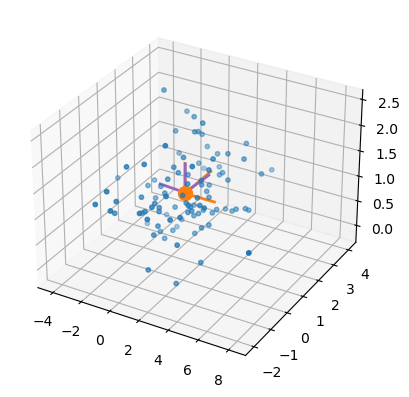

In [10]:
X, mu, Cov = make_data(N=100, sigmasq=0.1)
D, K = 3, 2
hatmu, hatW, hatsigmasq = PPCA(X, K)
hatCov = hatW @ hatW.T + hatsigmasq * np.eye(D)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_principle_axes(Cov, mu, ax, "tab:orange")
plot_principle_axes(hatCov, hatmu, ax, "tab:purple")
ax.scatter(X[:,0], X[:,1], X[:,2], color="tab:blue", s=10, zorder=0)
ax.scatter(mu[0], mu[1], mu[2], color="tab:orange", s=100, depthshade=False, zorder=5)
plt.show()

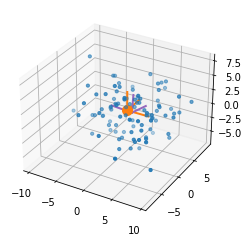

In [17]:
X, mu, Cov = make_data(N=100, sigmasq=10)
D, K = 3, 2
hatmu, hatW, hatsigmasq = PPCA(X, K)
hatCov = hatW @ hatW.T + hatsigmasq * np.eye(D)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_principle_axes(Cov, mu, ax, "tab:orange")
plot_principle_axes(hatCov, hatmu, ax, "tab:purple")
ax.scatter(X[:,0], X[:,1], X[:,2], color="tab:blue", s=10, zorder=0)
ax.scatter(mu[0], mu[1], mu[2], color="tab:orange", s=100, depthshade=False, zorder=5)
plt.show()

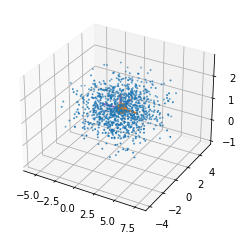

In [18]:
X, mu, Cov = make_data(N=1000, sigmasq=0.1)
D, K = 3, 2
hatmu, hatW, hatsigmasq = PPCA(X, K)
hatCov = hatW @ hatW.T + hatsigmasq * np.eye(D)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_principle_axes(Cov, mu, ax, "tab:orange")
plot_principle_axes(hatCov, hatmu, ax, "tab:purple")
ax.scatter(X[:,0], X[:,1], X[:,2], color="tab:blue", s=1, zorder=0)
ax.scatter(mu[0], mu[1], mu[2], color="tab:orange", s=100, depthshade=False, zorder=5)
plt.show()

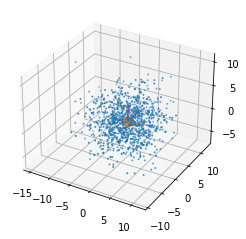

In [19]:
X, mu, Cov = make_data(N=1000, sigmasq=10)
D, K = 3, 2
hatmu, hatW, hatsigmasq = PPCA(X, K)
hatCov = hatW @ hatW.T + hatsigmasq * np.eye(D)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_principle_axes(Cov, mu, ax, "tab:orange")
plot_principle_axes(hatCov, hatmu, ax, "tab:purple")
ax.scatter(X[:,0], X[:,1], X[:,2], color="tab:blue", s=1, zorder=0)
ax.scatter(mu[0], mu[1], mu[2], color="tab:orange", s=100, depthshade=False, zorder=5)
plt.show()

## Reconstruction
Recall that for the latent variable $z$ we have
$$E[z | x] = (W^TW + \sigma^2 I_K)^{-1}W^T(x-\mu).$$
And furthermore
$$E[x | z] = Wz + \mu.$$
This gives us a way to reconstruct $x$. In particular, using $\hat{W}$, $\hat{\mu}$, and $\hat{\sigma}$, we can estimate the best latent variable $z$ for $x$, and we can later use that $z$ for reconstruction. Let's see how the reconstruction error varries with the number of samples.

In [ ]:
sigmasq = 0.1
X_train, mu, Cov = make_data(10, sigmasq)
hatmu, hatW, hatsigmasq = PPCA(X_train, K)
X_test, mu, Cov = make_data(1000, sigmasq)
X_rec = hatmu + (X_test - hatmu) @ hatW @ LA.inv(hatW.T @ hatW + hatsigmasq * np.eye(K)) @ hatW.T
print(f'Rec error: {np.sum((X_test - X_rec) ** 2) / 1000:.3f}')

Rec error: 0.645


In [ ]:
X_train, mu, Cov = make_data(1000, sigmasq)
hatmu, hatW, hatsigmasq = PPCA(X_train, K)
X_test, mu, Cov = make_data(1000, sigmasq)
X_rec = hatmu + (X_test - hatmu) @ hatW @ LA.inv(hatW.T @ hatW + hatsigmasq * np.eye(K)) @ hatW.T
print(f'Rec error: {np.sum((X_test - X_rec) ** 2) / 1000:.3f}')

Rec error: 0.547


Would you expect the reconstruction error to converge to zero as the number of training samples increases?